In [1]:
import sys
print(sys.executable)

C:\Users\USER\Cancer_Analysis_Project\venv\Scripts\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [6]:
df = pd.read_csv('C:/Users/USER/Downloads/archive/global_cancer_patients_2015_2024.csv')

df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('C:/Users/USER/Downloads/archive/global_cancer_patients_2015_2024.csv')

# Age Group
bins_age = [19, 34, 49, 64, 120]
labels_age = ['Young Adult', 'Mid-Age', 'Senior', 'Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, include_lowest=True)

# Genetic Risk Level
bins_risk = [0, 3, 6, 10]
labels_risk = ['Low', 'Medium', 'High']
df['Genetic_Risk_Level'] = pd.cut(df['Genetic_Risk'], bins=bins_risk, labels=labels_risk, include_lowest=True)

# Combined Lifestyle Risk Score & Level
df['Lifestyle_Risk_Score'] = df['Smoking'] + df['Alcohol_Use'] + df['Obesity_Level']
bins_lifestyle = [-1, 9, 18, 30]
labels_lifestyle = ['Low', 'Medium', 'High']
df['Lifestyle_Risk_Level'] = pd.cut(df['Lifestyle_Risk_Score'], bins=bins_lifestyle, labels=labels_lifestyle)

# Treatment Cost Brackets
bins_cost = [-1, 20000, 60000, df['Treatment_Cost_USD'].max()]
labels_cost = ['Low', 'Medium', 'High']
df['Treatment_Cost_Bracket'] = pd.cut(df['Treatment_Cost_USD'], bins=bins_cost, labels=labels_cost)

# Survival Category
bins_survival = [-1, 2, 6, df['Survival_Years'].max()]
labels_survival = ['Short', 'Medium', 'Long']
df['Survival_Category'] = pd.cut(df['Survival_Years'], bins=bins_survival, labels=labels_survival)

# Severity Level
bins_severity = [-1, 4, 7, 10]
labels_severity = ['Mild', 'Moderate', 'Severe']
df['Severity_Level'] = pd.cut(df['Target_Severity_Score'], bins=bins_severity, labels=labels_severity)


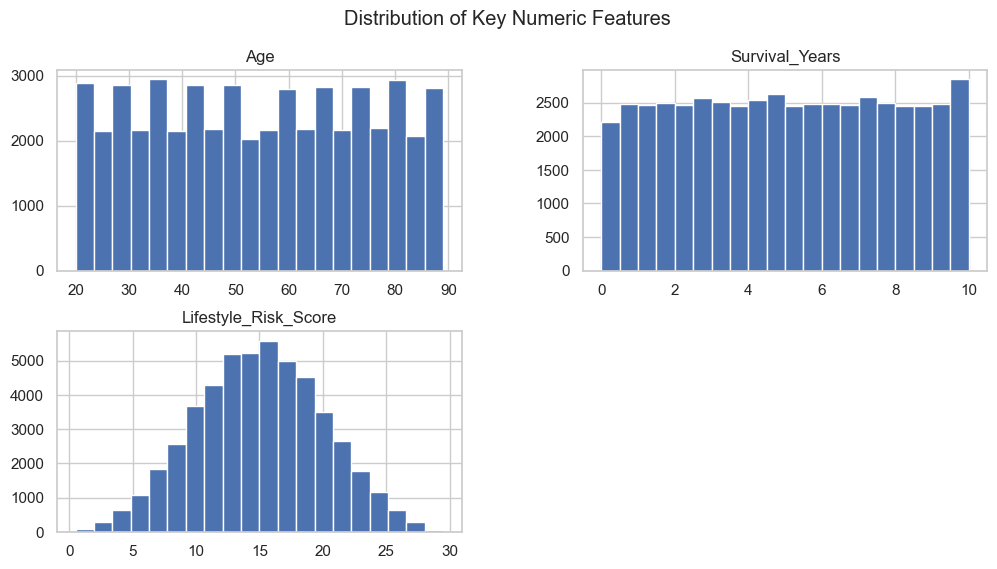

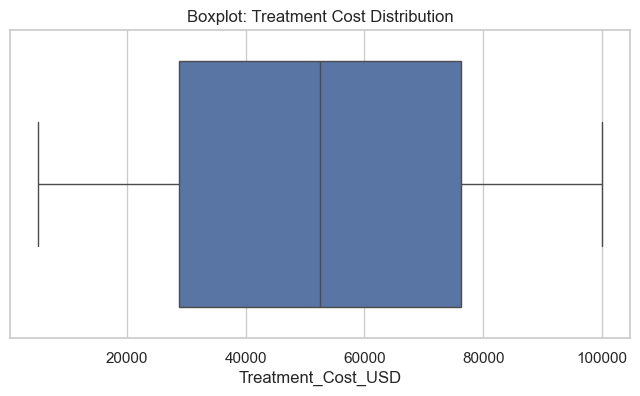

In [4]:
# Histogram for Age, Survival_Years, Lifestyle_Risk_Score
df[['Age', 'Survival_Years', 'Lifestyle_Risk_Score']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Key Numeric Features')
plt.show()

# Boxplot for Treatment Cost
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Treatment_Cost_USD'])
plt.title('Boxplot: Treatment Cost Distribution')
plt.show()

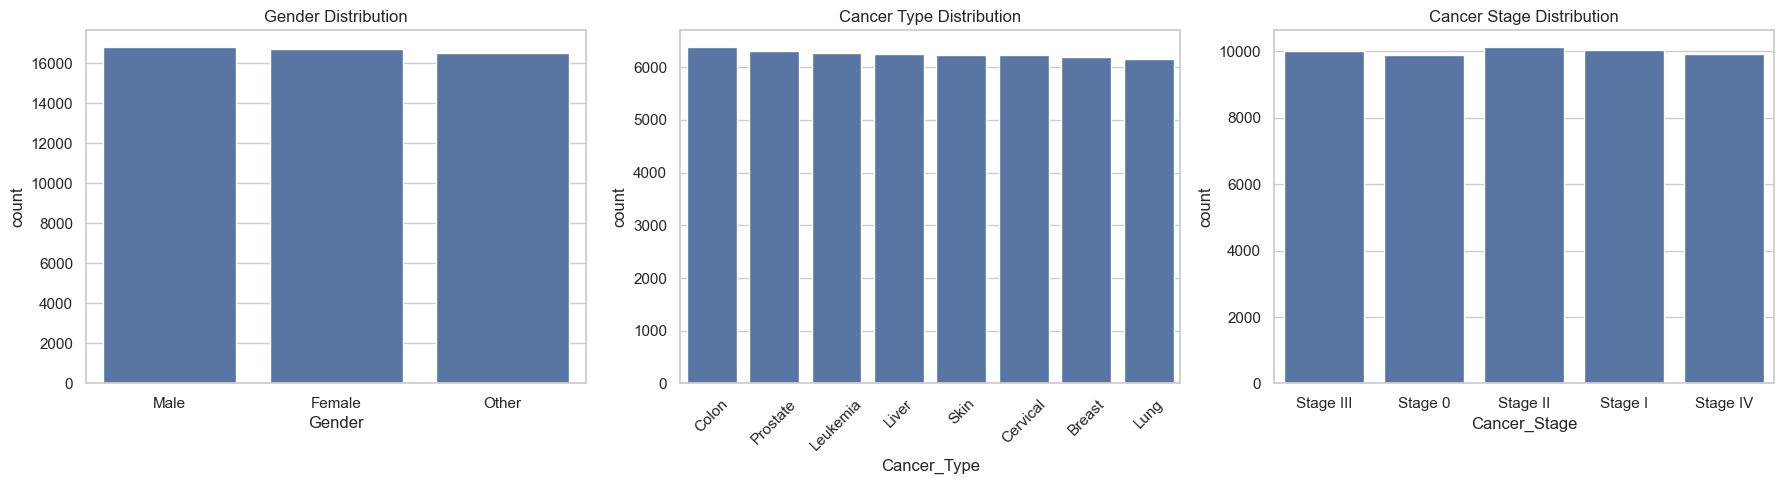

In [5]:
# Count plots for Gender, Cancer_Type, Cancer_Stage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(ax=axes[0], data=df, x='Gender')
axes[0].set_title('Gender Distribution')

sns.countplot(ax=axes[1], data=df, x='Cancer_Type', order=df['Cancer_Type'].value_counts().index)
axes[1].set_title('Cancer Type Distribution')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=df, x='Cancer_Stage')
axes[2].set_title('Cancer Stage Distribution')

plt.tight_layout()
plt.show()

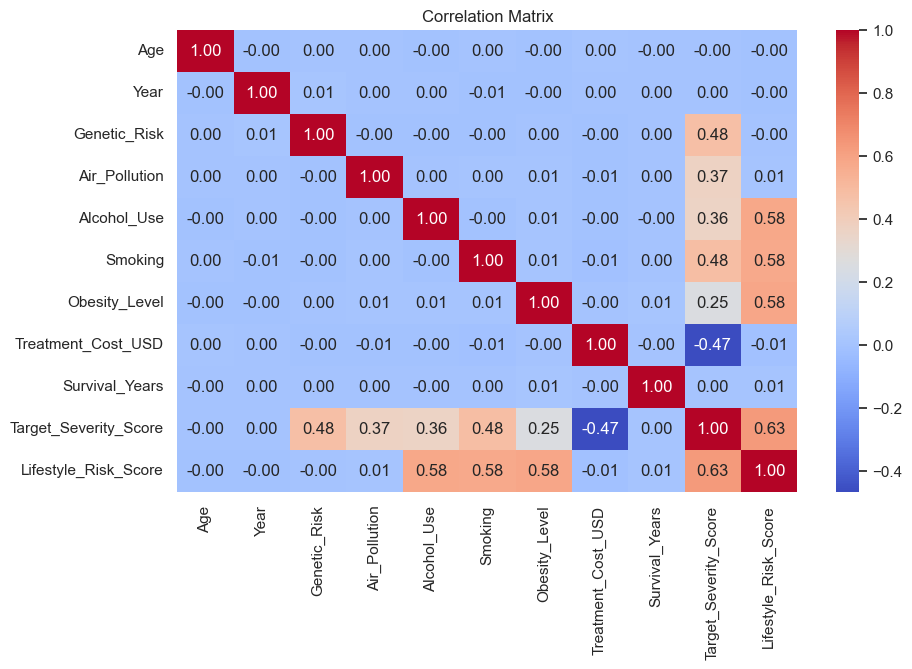

In [6]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('C:/Users/USER/Downloads/archive/global_cancer_patients_2015_2024.csv')

# Check if loaded correctly (optional)
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


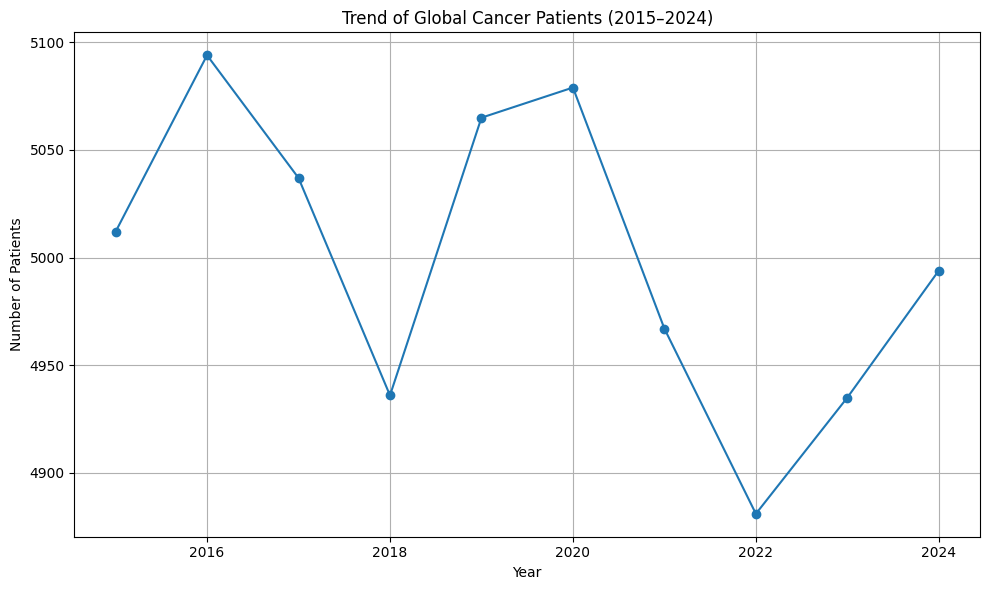

In [3]:
# Group by year and count number of patients
yearly_trend = df.groupby('Year').size()

# Plot
plt.figure(figsize=(10, 6))  # Set the figure size
yearly_trend.plot(marker='o')  # Plot a line graph with dots for each year
plt.title('Trend of Global Cancer Patients (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Countries by Average Treatment Cost (USD):
Country_Region
China        52899.413814
USA          52878.648158
Germany      52769.251439
Australia    52621.637121
Canada       52584.225541
Brazil       52540.892254
Russia       52319.453980
India        52284.925133
UK           52199.851308
Pakistan     51567.959389
Name: Treatment_Cost_USD, dtype: float64


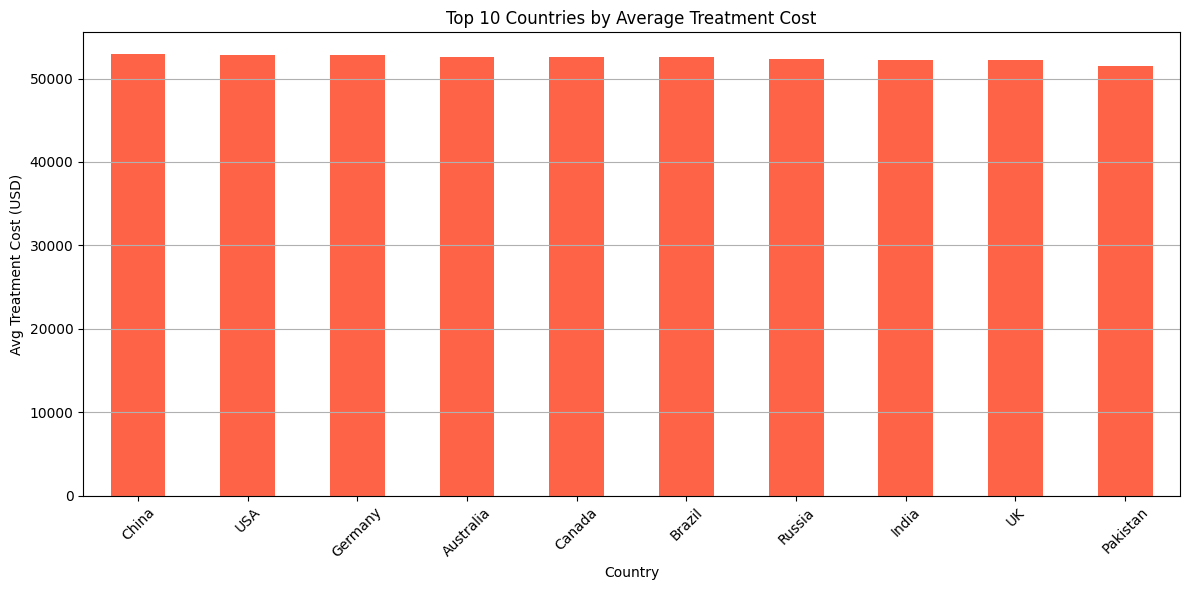

In [5]:
# Group by country and compute average treatment cost
avg_cost_by_country = df.groupby('Country_Region')['Treatment_Cost_USD'].mean().sort_values(ascending=False)

# Display the top 10 countries with highest average treatment cost
print("Top 10 Countries by Average Treatment Cost (USD):")
print(avg_cost_by_country.head(10))

# Plotting
plt.figure(figsize=(12, 6))
avg_cost_by_country.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Countries by Average Treatment Cost')
plt.ylabel('Avg Treatment Cost (USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


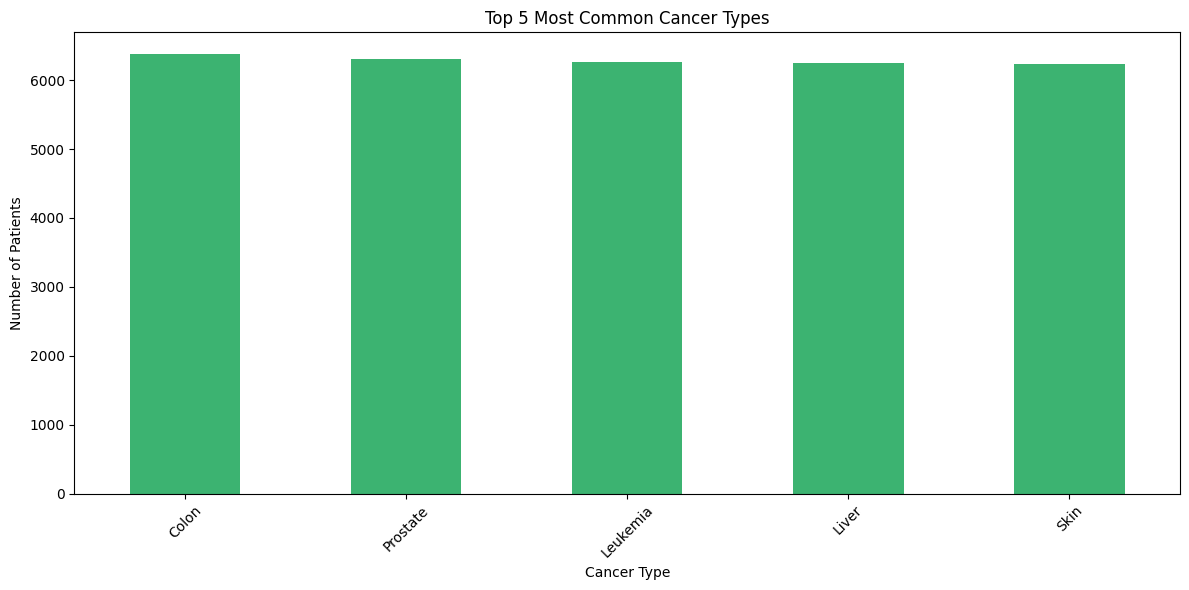

In [17]:
# Count the number of patients by cancer type
cancer_counts = df['Cancer_Type'].value_counts()

# Plot the top 5 most common cancer types
plt.figure(figsize=(12, 6))
cancer_counts.head(5).plot(kind='bar', color='mediumseagreen')
plt.title('Top 5 Most Common Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Cancer Types by Average Treatment Cost:
Cancer_Type
Lung        53130.622060
Prostate    52620.302254
Leukemia    52528.469202
Breast      52484.264228
Liver       52460.606886
Name: Treatment_Cost_USD, dtype: float64


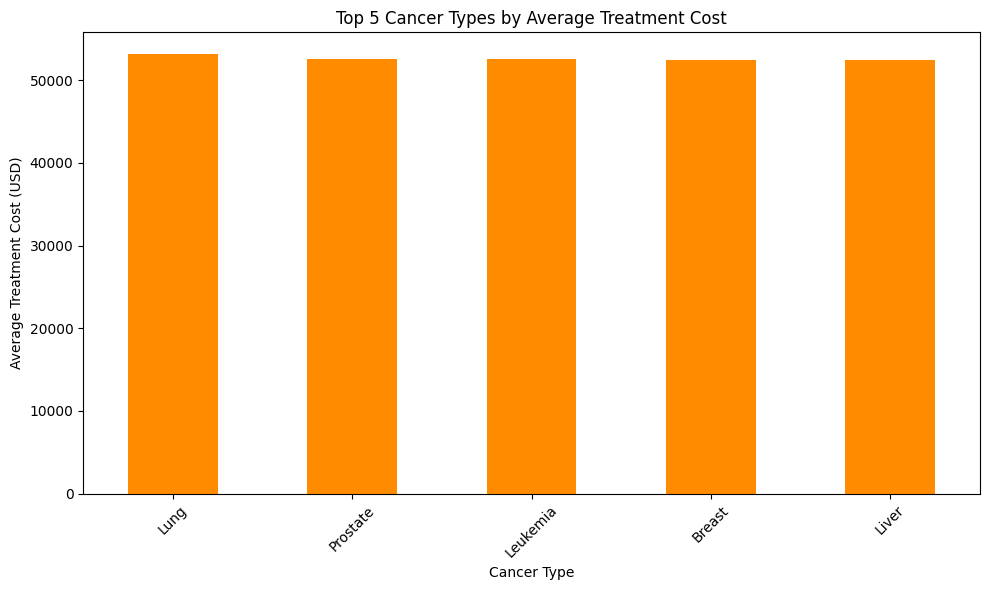

In [16]:
# Group by cancer type and calculate average treatment cost
avg_cost_by_cancer_type = df.groupby('Cancer_Type')['Treatment_Cost_USD'].mean().sort_values(ascending=False)

# Display top 5
print("Top 5 Cancer Types by Average Treatment Cost:")
print(avg_cost_by_cancer_type.head(5))

# Plot top 5 as bar chart
plt.figure(figsize=(10, 6))
avg_cost_by_cancer_type.head(5).plot(kind='bar', color='darkorange')
plt.title('Top 5 Cancer Types by Average Treatment Cost')
plt.ylabel('Average Treatment Cost (USD)')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Survival Years by Cancer Stage:
Cancer_Stage
Stage III    5.036311
Stage 0      5.015199
Stage I      5.012990
Stage II     4.995170
Stage IV     4.972596
Name: Survival_Years, dtype: float64


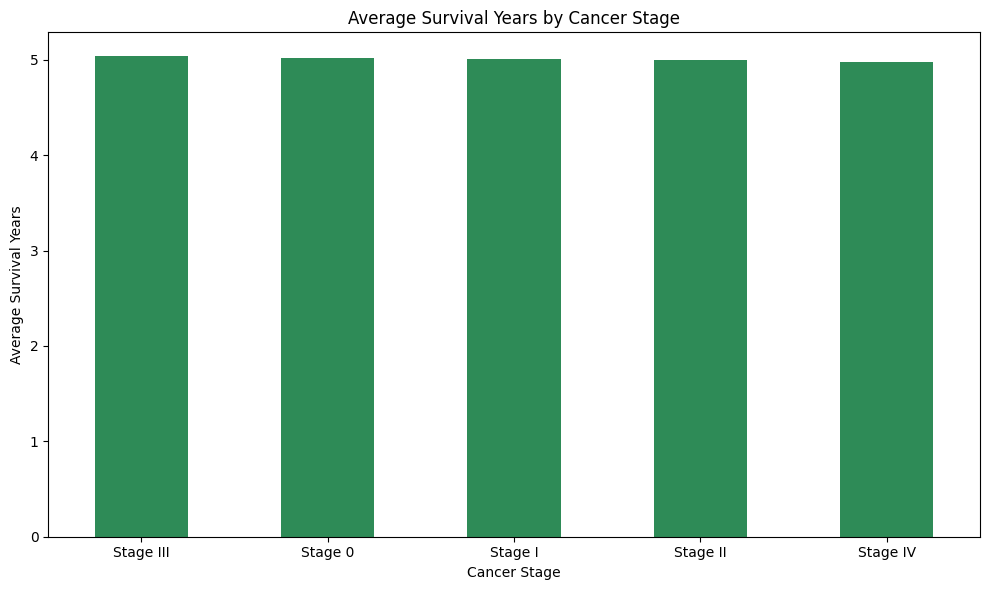

In [18]:
# Group by Cancer Stage and calculate average Survival Years
avg_survival_by_stage = df.groupby('Cancer_Stage')['Survival_Years'].mean().sort_values(ascending=False)

# Display results
print("Average Survival Years by Cancer Stage:")
print(avg_survival_by_stage)

# Plot the result
plt.figure(figsize=(10, 6))
avg_survival_by_stage.plot(kind='bar', color='seagreen')
plt.title('Average Survival Years by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Average Survival Years')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Correlation with Survival Years:
Smoking          0.001371
Alcohol_Use     -0.000527
Obesity_Level    0.009771
Name: Survival_Years, dtype: float64


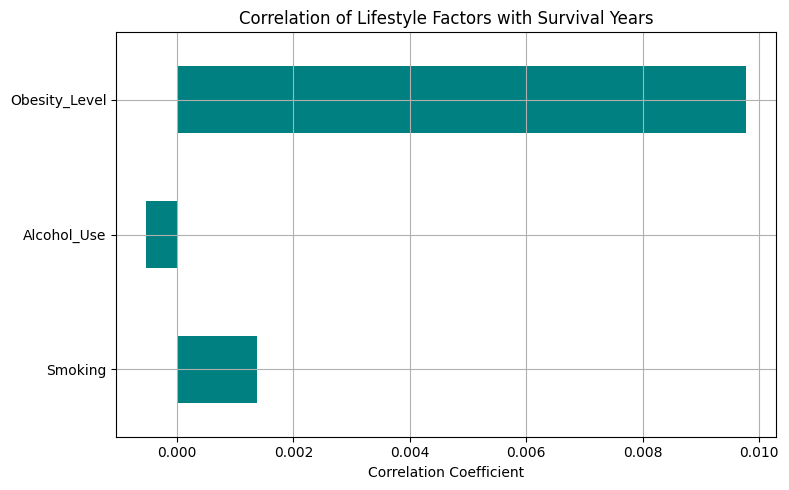

In [19]:
# Select relevant columns
lifestyle_cols = ['Smoking', 'Alcohol_Use', 'Obesity_Level', 'Survival_Years']

# Compute correlation
correlation_lifestyle = df[lifestyle_cols].corr()

# Extract correlation with Survival_Years only
cor_with_survival = correlation_lifestyle['Survival_Years'].drop('Survival_Years')  # drop self-correlation

# Display the correlation values
print("Correlation with Survival Years:")
print(cor_with_survival)

# Plot
plt.figure(figsize=(8, 5))
cor_with_survival.plot(kind='barh', color='teal')
plt.title('Correlation of Lifestyle Factors with Survival Years')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('C:/Users/USER/Downloads/archive/global_cancer_patients_2015_2024.csv')

# Check if loaded correctly (optional)
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


        Treatment_Cost_USD  Survival_Years
Gender                                    
Female        52091.373540        5.033515
Male          52564.402015        5.002447
Other         52749.224323        4.983146


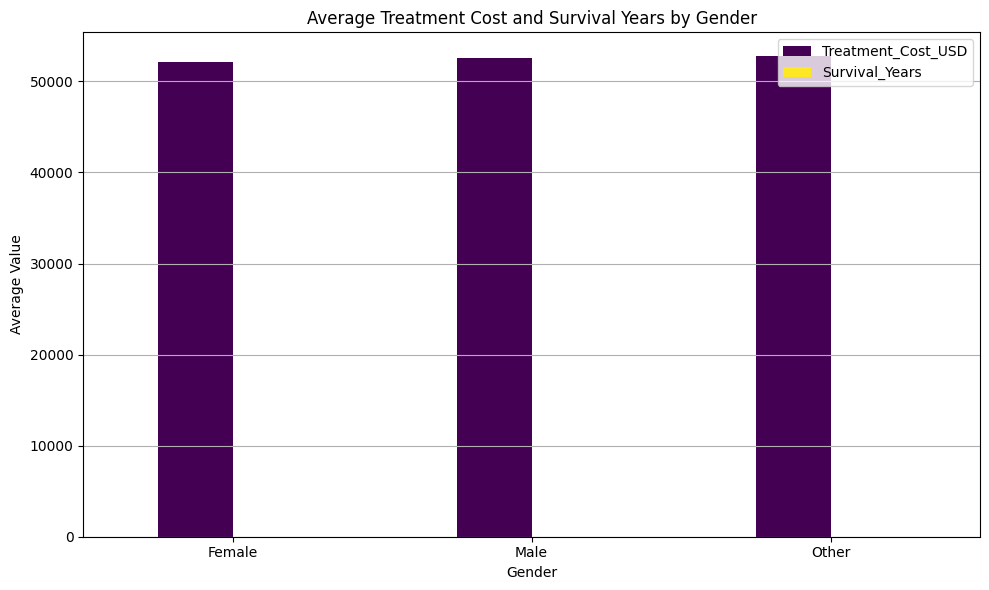

In [5]:
# Group by Gender and calculate average Treatment Cost and Survival Years
gender_summary = df.groupby('Gender')[['Treatment_Cost_USD', 'Survival_Years']].mean()
print(gender_summary)

# Plot
gender_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Treatment Cost and Survival Years by Gender')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 countries by patient count
top_countries = df['Country_Region'].value_counts().head(10).index

# Filter dataset
df_top_countries = df[df['Country_Region'].isin(top_countries)]

# Group by Country and calculate averages
country_summary = df_top_countries.groupby('Country_Region')[['Treatment_Cost_USD', 'Survival_Years']].mean()

# Plot
country_summary.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Treatment Cost and Survival Years by Country (Top 10)')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


                Treatment_Cost_USD  Survival_Years
Country_Region                                    
Australia             52621.637121        4.995974
Brazil                52540.892254        5.009812
Canada                52584.225541        5.029893
China                 52899.413814        4.926094
Germany               52769.251439        5.040983
India                 52284.925133        4.962917
Pakistan              51567.959389        4.987109
Russia                52319.453980        4.987223
UK                    52199.851308        5.061759
USA                   52878.648158        5.060929


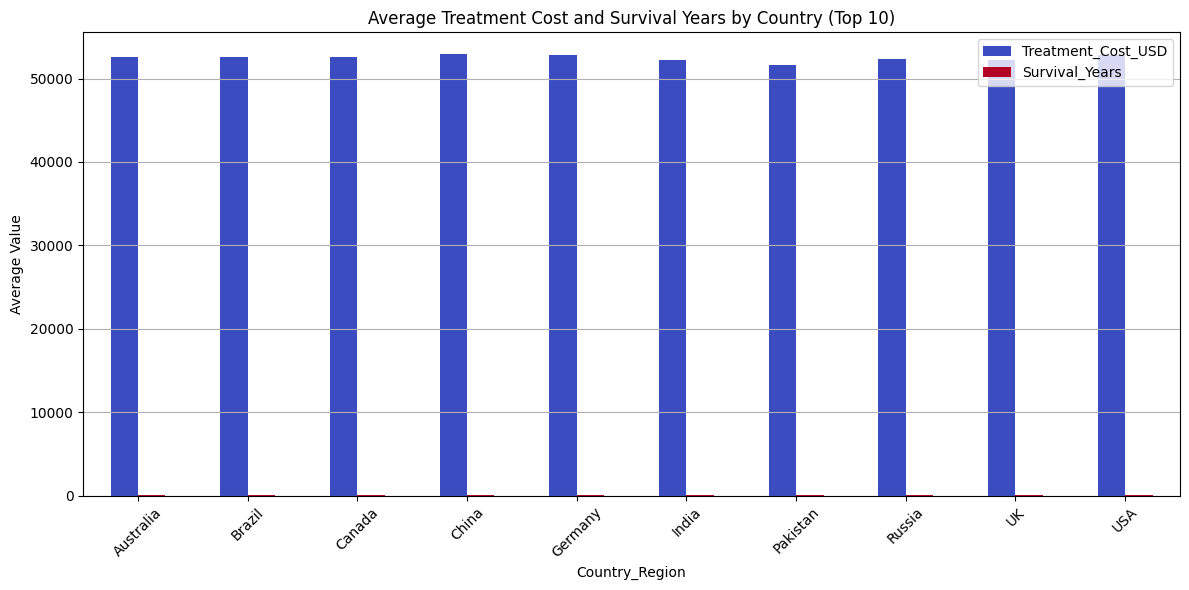

In [8]:
# Top 10 countries by patient count
top_countries = df['Country_Region'].value_counts().head(10).index

# Filter dataset
df_top_countries = df[df['Country_Region'].isin(top_countries)]

# Group by Country and calculate averages
country_summary = df_top_countries.groupby('Country_Region')[['Treatment_Cost_USD', 'Survival_Years']].mean()
print(country_summary)

# Plot
country_summary.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Treatment Cost and Survival Years by Country (Top 10)')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Correlation between Treatment Cost, Survival Years, and Severity Score:

                       Treatment_Cost_USD  Survival_Years  \
Treatment_Cost_USD               1.000000       -0.000429   
Survival_Years                  -0.000429        1.000000   
Target_Severity_Score           -0.466058        0.004161   

                       Target_Severity_Score  
Treatment_Cost_USD                 -0.466058  
Survival_Years                      0.004161  
Target_Severity_Score               1.000000  


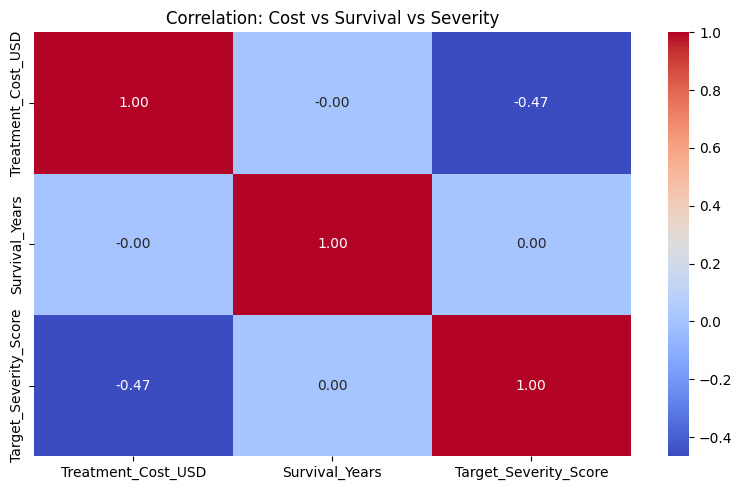

In [9]:
# 1. Select the relevant columns
cost_related = df[['Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']]

# 2. Correlation matrix
correlation_cost = cost_related.corr()
print("Correlation between Treatment Cost, Survival Years, and Severity Score:\n")
print(correlation_cost)

import seaborn as sns

# 3. Visualize with a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_cost, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Cost vs Survival vs Severity')
plt.tight_layout()
plt.show()

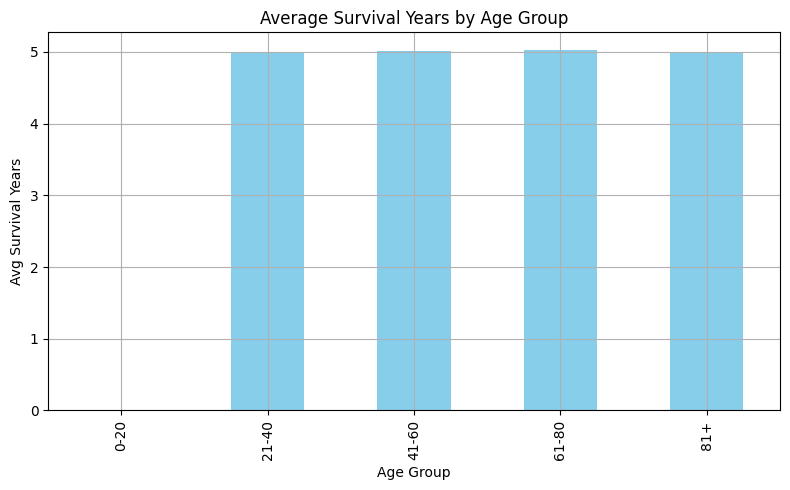

Age_Group
0-20          NaN
21-40    4.997683
41-60    5.007438
61-80    5.022193
81+      4.990599
Name: Survival_Years, dtype: float64


In [14]:
# Define age bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']

# Create a new column for age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate mean survival years
avg_survival_by_age = df.groupby('Age_Group', observed=False)['Survival_Years'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_survival_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Survival Years by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Survival Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the survival values
print(avg_survival_by_age)


In [23]:
# Group by region and calculate means
region_stats = df.groupby('Country_Region')[['Target_Severity_Score', 'Treatment_Cost_USD']].mean()

# Calculate global average cost and severity
avg_cost = df['Treatment_Cost_USD'].mean()
avg_severity = df['Target_Severity_Score'].mean()

# Filter regions with severity above average and cost below average
high_severity_low_cost = region_stats[
    (region_stats['Target_Severity_Score'] > avg_severity) &
    (region_stats['Treatment_Cost_USD'] < avg_cost)
].sort_values(by='Target_Severity_Score', ascending=False)

# Filter regions with severity below average and cost above average
low_severity_high_cost = region_stats[
    (region_stats['Target_Severity_Score'] < avg_severity) &
    (region_stats['Treatment_Cost_USD'] > avg_cost)
].sort_values(by='Treatment_Cost_USD', ascending=False)

# Show top 10 of each
print("Top 10 Regions with HIGH Severity but LOW Cost (Potential Healthcare Gaps):\n")
print(high_severity_low_cost.head(10))

print("\nTop 10 Regions with LOW Severity but HIGH Cost (Possible Over-treatment or High-cost Systems):\n")
print(low_severity_high_cost.head(10))

Top 10 Regions with HIGH Severity but LOW Cost (Potential Healthcare Gaps):

                Target_Severity_Score  Treatment_Cost_USD
Country_Region                                           
Russia                       4.961126        52319.453980
UK                           4.958182        52199.851308
Pakistan                     4.955905        51567.959389

Top 10 Regions with LOW Severity but HIGH Cost (Possible Over-treatment or High-cost Systems):

                Target_Severity_Score  Treatment_Cost_USD
Country_Region                                           
China                        4.937570        52899.413814
Germany                      4.944063        52769.251439
Australia                    4.946477        52621.637121
Brazil                       4.934291        52540.892254


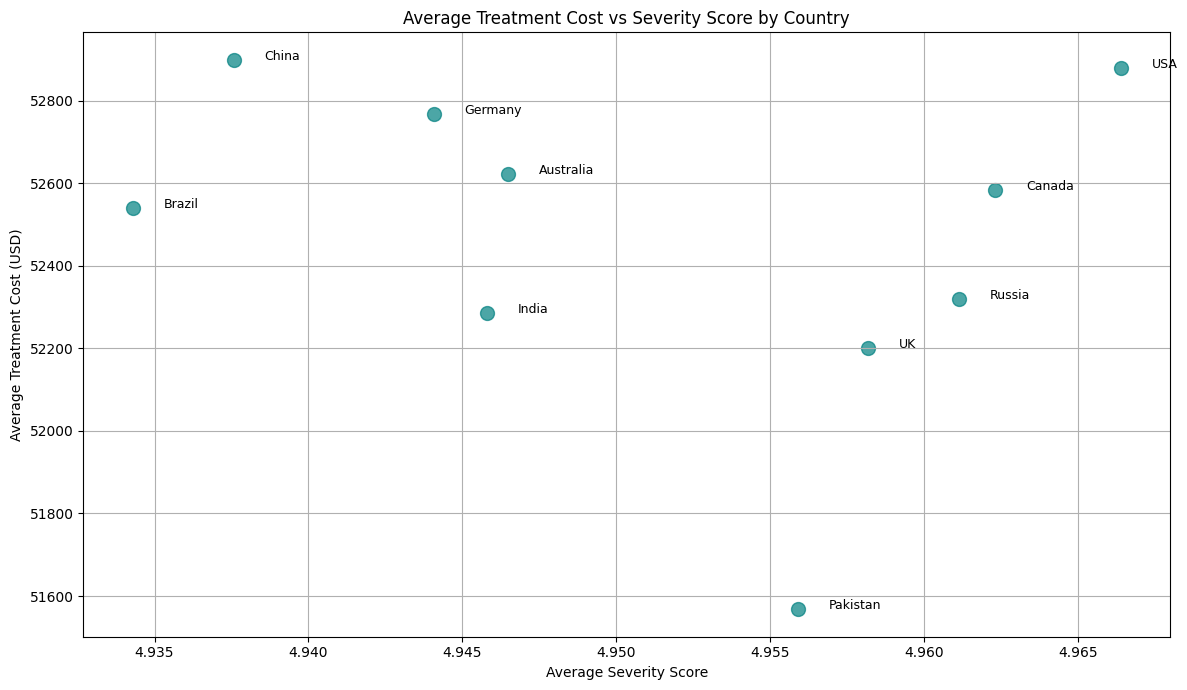

In [24]:
# Group data by country and calculate mean severity and treatment cost
country_summary = df.groupby('Country_Region')[['Target_Severity_Score', 'Treatment_Cost_USD']].mean()

# Plot the scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(
    country_summary['Target_Severity_Score'], 
    country_summary['Treatment_Cost_USD'], 
    color='teal', 
    s=100, 
    alpha=0.7
)

# Annotate each point with the country name
for country, row in country_summary.iterrows():
    plt.text(
        row['Target_Severity_Score'] + 0.001,  # a slight offset
        row['Treatment_Cost_USD'],
        country,
        fontsize=9
    )

# Set titles and labels
plt.title('Average Treatment Cost vs Severity Score by Country')
plt.xlabel('Average Severity Score')
plt.ylabel('Average Treatment Cost (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


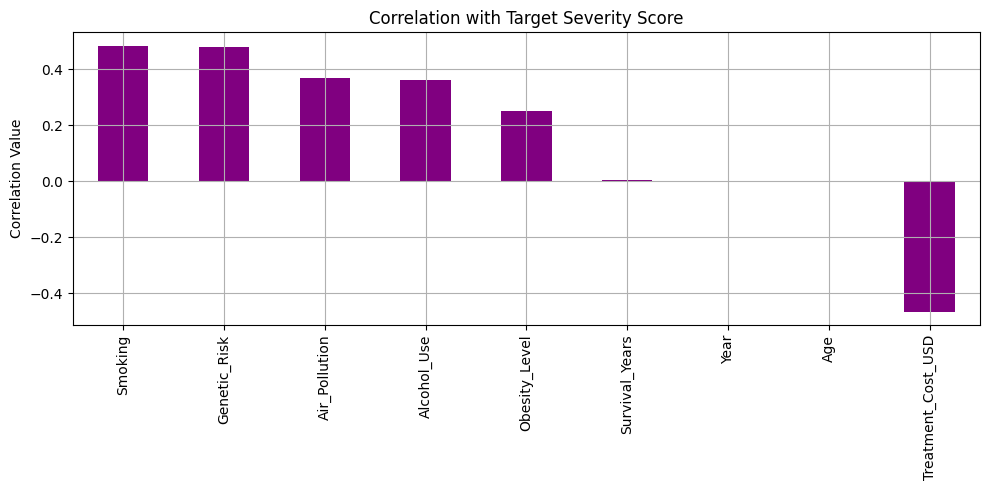

Smoking               0.484420
Genetic_Risk          0.478700
Air_Pollution         0.366963
Alcohol_Use           0.363250
Obesity_Level         0.251366
Survival_Years        0.004161
Year                  0.002109
Age                  -0.001481
Treatment_Cost_USD   -0.466058
Name: Target_Severity_Score, dtype: float64


In [25]:
# Select numeric columns for correlation
numeric_features = df.select_dtypes(include='number')

# Correlation matrix with Severity Score
severity_corr = numeric_features.corr()['Target_Severity_Score'].drop('Target_Severity_Score')

# Plot correlation values with Severity Score
plt.figure(figsize=(10, 5))
severity_corr.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Correlation with Target Severity Score')
plt.ylabel('Correlation Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation values
print(severity_corr.sort_values(ascending=False))


In [26]:
# Check average survival years per cancer stage
avg_survival_by_stage = df.groupby('Cancer_Stage')['Survival_Years'].mean().sort_values()

print(avg_survival_by_stage)

Cancer_Stage
Stage IV     4.972596
Stage II     4.995170
Stage I      5.012990
Stage 0      5.015199
Stage III    5.036311
Name: Survival_Years, dtype: float64


In [27]:
# Correlation between Genetic Risk and Severity
genetic_corr = df['Genetic_Risk'].corr(df['Target_Severity_Score'])
print(f"Correlation between Genetic Risk and Severity Score: {genetic_corr:.3f}")


Correlation between Genetic Risk and Severity Score: 0.479


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('C:/Users/USER/Downloads/archive/global_cancer_patients_2015_2024.csv')
# Correlation

cost_severity_corr = df['Treatment_Cost_USD'].corr(df['Target_Severity_Score'])
print(f"Cost vs Severity Correlation: {cost_severity_corr:.3f}")

# Average cost by stage
print(df.groupby('Cancer_Stage')['Treatment_Cost_USD'].mean().sort_values(ascending=False))

# Average cost by cancer type
print(df.groupby('Cancer_Type')['Treatment_Cost_USD'].mean().sort_values(ascending=False))


Cost vs Severity Correlation: -0.466
Cancer_Stage
Stage III    52708.197506
Stage I      52674.079638
Stage 0      52572.589493
Stage IV     52302.471041
Stage II     52082.841258
Name: Treatment_Cost_USD, dtype: float64
Cancer_Type
Lung        53130.622060
Prostate    52620.302254
Leukemia    52528.469202
Breast      52484.264228
Liver       52460.606886
Cervical    52361.535577
Colon       52167.461424
Skin        51997.513061
Name: Treatment_Cost_USD, dtype: float64


In [3]:
# Group by Gender
gender_summary = df.groupby('Gender')[['Treatment_Cost_USD', 'Survival_Years']].mean()
print(gender_summary)


        Treatment_Cost_USD  Survival_Years
Gender                                    
Female        52091.373540        5.033515
Male          52564.402015        5.002447
Other         52749.224323        4.983146
